In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_directory = os.getcwd()[:-22] + 'dataset\\'
csv_file = 'features.csv'
csv_file_path = os.path.join(csv_directory, csv_file)
dataset = pd.read_csv(csv_file_path, delimiter=';')
pd.set_option('display.max_columns', 52)
dataset.head()

,post_id,post_name,version,tags_number,is_featured,score,created_at_day,created_at_daytime,launched_day,is_best_time_to_launch,is_best_day_to_launch,is_weekend,post_description,positive_description_sentiment,negative_description_sentiment,discretized_positive_description_score,discretized_negative_description_score,discretized_neutral_description_score,text_description_length,sentence_length_in_the_description,bullet_points_explicit_features,emoji_in_description,post_tagline,tagline_length,emoji_in_tagline,are_there_video,are_there_tweetable_images,are_there_gif_images,number_of_gif,offers,promo_discount_codes,are_there_questions,hunter_id,hunter_name,hunter_has_twitter,hunter_has_website,hunter_followers,hunter_apps_made,hunter_follows_up_on_comments,maker_id,maker_name,maker_has_twitter,maker_has_website,maker_followers,maker_follows_up_on_comments,post_comment,positive_comment_sentiment,negative_comment_sentiment,discretized_positive_comment_score,discretized_negative_comment_score,discretized_neutral_comment_score,topic
0,29143,Hotjar v1,1.0,4,Yes,2771,30/08/2018,28/07/2015 05:12:28,Tuesday,Yes,Yes,No,Hotjar v1 is a new and easy way to truly under...,2,-1,True,False,False,Short,Short,No,No,See how your visitors are really using your si...,Long,No,No,Yes,No,0,No,No,Yes,36143,Stewart Rogers,Yes,Yes,Low,Medium,Yes,9151,Dr David Darmanin,Yes,Yes,Low,No,NaN,1,-1,False,False,True,web development
1,91504,F5Bot,1.0,6,Yes,313,12/10/2018,12/10/2018 00:00:00,Friday,No,No,No,F5Bot is a free service that emails you when y...,2,-1,True,False,False,Medium,Medium,No,No,Get emailed when your brand is mentioned on Re...,Long,No,No,No,No,0,No,No,No,473726,Min Park,Yes,Yes,Low,Low,Yes,815976,Lewis Van Winkle,Yes,Yes,Low,Yes,NaN,1,-1,False,False,True,web development
2,112580,Hims,1.0,2,Yes,442,10/09/2018,03/11/2017 03:02:00,Friday,Yes,No,No,Hims is a men's wellness brand built to help g...,2,-3,True,True,False,Long,Short,No,No,"Helping men prevent hair loss, erectile dysfun...",Long,No,No,No,No,0,No,No,No,2,Ryan Hoover,Yes,No,High,High,Yes,1069083,andrewdudum 🚀,Yes,Yes,Low,No,NaN,1,-1,False,False,True,web development
3,119579,Deep Learning Platform (DLP),1.0,3,Yes,208,08/12/2018,08/12/2018 00:00:00,Saturday,No,No,Yes,Hello world!\n\nI am DLP for developers. You c...,2,-1,True,False,False,Long,Short,No,No,Software for DL application development withou...,Long,No,Yes,No,No,0,No,No,No,1173498,Nasser Njikam,No,Yes,Low,Low,No,1173498,Nasser Njikam,No,Yes,Low,No,NaN,1,-1,False,False,True,community
4,121620,DLive,1.0,4,Yes,166,06/07/2018,06/07/2018 00:00:00,Friday,No,No,No,DLive is the first decentralized live streamin...,1,-2,False,True,False,Medium,Short,No,No,Decentralized YouTube on the Steem blockchain,Medium,No,No,No,Yes,1,No,No,No,1190714,Md Amirul Islam,Yes,No,Low,Low,No,1273356,Charles Wayn,Yes,Yes,Low,Yes,"@davecraige @rrhoover , Thanks for supporting ...",2,-2,True,True,False,community


# Distribuzione della colonna is_featured

In [3]:
# Distribution of attribute is_featured 
dataset['is_featured'].value_counts()

Yes    2053
No     1484
Name: is_featured, dtype: int64

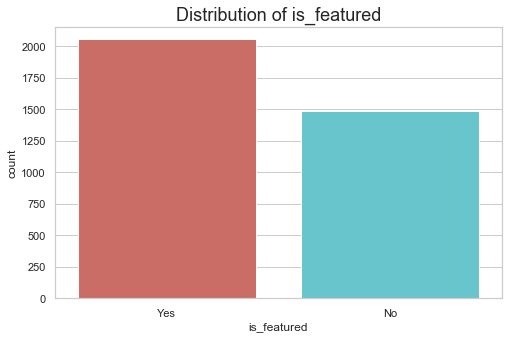

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x='is_featured', data=dataset, palette='hls').set_title('Distribution of is_featured', fontsize=18)
plt.savefig('distribution_of_is_featured_column')

In [5]:
count_posts_not_featured = len(dataset[dataset['is_featured']=='No'])
count_posts_featured = len(dataset[dataset['is_featured']=='Yes'])
percentage_of_posts_featured = count_posts_featured / (count_posts_not_featured + count_posts_featured)
print("Posts featured: {:.2f}%".format(percentage_of_posts_featured*100))
percentage_of_posts_not_featured = count_posts_not_featured / (count_posts_not_featured + count_posts_featured)
print("Posts not featured: {:.2f}%".format(percentage_of_posts_not_featured*100))

Posts featured: 58.04%
Posts not featured: 41.96%


# Numero di hunter diversi tra loro

In [6]:
# Numero di hunter che sono diversi
dataset['hunter_id'].nunique()

2914

# Analisi della variabile maker_follows_up_on_comments

In [7]:
dataset['maker_follows_up_on_comments'].value_counts()

Yes    1973
No     1564
Name: maker_follows_up_on_comments, dtype: int64

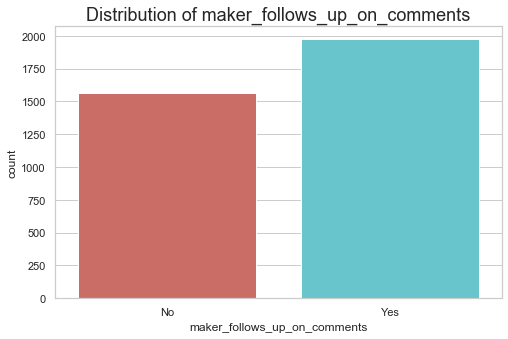

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='maker_follows_up_on_comments', data=dataset, palette='hls').set_title('Distribution of maker_follows_up_on_comments', fontsize=18)
plt.savefig('distribution_of_maker_follows_up_on_comments_column')

In [9]:
count_makers_not_follow_up_on_comments = len(dataset[dataset['maker_follows_up_on_comments']=='No'])
count_makers_follow_up_on_comments = len(dataset[dataset['maker_follows_up_on_comments']=='Yes'])
percentage_of_makers_follow_up_on_comments = count_makers_follow_up_on_comments / (count_makers_not_follow_up_on_comments + count_makers_follow_up_on_comments)
print("Makers follow up on comments: {:.2f}%".format(percentage_of_makers_follow_up_on_comments*100))
percentage_of_makers_not_follow_up_on_comments = count_makers_not_follow_up_on_comments / (count_makers_not_follow_up_on_comments + count_makers_follow_up_on_comments)
print("Makers not follow up on comments: {:.2f}%".format(percentage_of_makers_not_follow_up_on_comments*100))

Makers follow up on comments: 55.78%
Makers not follow up on comments: 44.22%


In [10]:
csv_file = 'analysis_makers_follow_up_on_comments.csv'
csv_file_path = os.path.join(csv_directory, csv_file)
analysis_makers = pd.read_csv(csv_file_path, delimiter=';')
pd.set_option('display.max_colwidth', -1)

In [11]:
def make_clickable(val):
    return '<a href="{}">{}</a>'.format(val, val)

analysis_makers.head(100).style.format({'url': make_clickable})

,post_id,url,note
0,130369,https://www.producthunt.com/posts/beyond-keywords-the-advanced-digital-marketing-podcast,"In questo post è presente un unico commento ed è stato scritto dal maker, quindi non è stato aperto nessun dibattito"
1,135583,https://www.producthunt.com/posts/snapsieve,"In questo post è presente un unico commento ed è stato scritto dal maker, quindi non è stato aperto nessun dibattito"
2,142291,https://www.producthunt.com/posts/write-together,In questo post il maker apre un dibattito su quali miglioramenti apportare in futuro alla sua applicazione
3,141241,https://www.producthunt.com/posts/maildump,In questo post il maker ha scritto solo commenti di ringraziamento rivolti agli utenti che hanno commentato di aver apprezzato il suo prodotto
4,129878,https://www.producthunt.com/posts/goodgrids,"In questo post è presente un unico commento ed è stato scritto dal maker, quindi non è stato aperto nessun dibattito"
5,136285,https://www.producthunt.com/posts/sharedbox,"In questo post ci sono solo due commenti del maker: nel primo ringrazia un utente che ha apprezzato il suo prodotto, mentre nel secondo risponde ad una critica che gli è stata fatta"
6,141963,https://www.producthunt.com/posts/sheetbase-2-0,In questo post il maker nei commenti risponde alle varie domande di chiarimento che diversi utenti gli pongono
7,136333,https://www.producthunt.com/posts/beanzoid,"In questo post è presente un unico commento ed è stato scritto dal maker, quindi non è stato aperto nessun dibattito"
8,153033,https://www.producthunt.com/posts/ask-roboflow,In questo post il maker nei commenti ha scritto che sta lavorando sulla sua applicazione affinchè un giorno possa essere di aiuto ai programmatori
9,141870,https://www.producthunt.com/posts/bigbit-standard,In questo post il maker scrive un commento in cui spiega in cosa consiste il prodotto lanciato ed esorta altri utenti ad implementarlo in altri linguaggi di programmazione


In [12]:
# count = np.array(np.where(mydata['hunter_id']==mydata['maker_id']))
# print(len(count[0]))

# print(analysis_makers.shape)
# print(analysis_makers['post_id'].nunique())

# Statistica descrittiva effettuata per gli hunter

Applicando il metodo `describe` fornito dalla libreria `pandas` alla colonna *hunter_id* è stato possibile effettuare una statistica descrittiva ottenendo più informazioni su questa colonna. Nello specifico:
* **count** indica il numero di celle non nulle per ogni riga
* **mean** indica la media dei valori contenuti nella colonna
* **std (standard deviation)** indica la deviazione standard 
* **min** indica il valore minimo contenuto nella colonna hunter_id
* **25%**, **50%** e **75%** indicano i quartili (in questo caso detti anche percentili), in particolare il percentile 50% rappresenta anche la mediana
* **max** indica il valore massimo contenuto nella colonna hunter_id

In [13]:
dataset['hunter_id'].describe().astype(int)

count    3537   
mean     793121 
std      552414 
min      2      
25%      202343 
50%      871349 
75%      1336934
max      1911403
Name: hunter_id, dtype: int32

Inoltre altri dettagli su questa colonna sono:
* **var** indica la varianza
* **skew (skewness)** indica l'indice di asimmetria, cioè un valore che cerca di fornire una misura della sua mancanza di simmetria
* **kurt (kurtosis)** inidica la curtosi, cioè l'allontanamento dalla normalità distributiva rispetto alla quale si verifica un maggiore appiattimento o un maggiore allungamento

In [14]:
print('var: {:.2f}'.format(dataset['hunter_id'].var()))
print('skew: {:.2f}'.format(dataset['hunter_id'].skew()))
print('kurt: {:.2f}'.format(dataset['hunter_id'].kurt()))

var: 305161562549.95
skew: -0.11
kurt: -1.48


Il diagramma rappresentato di seguito rappresenta il **box-plot (diagramma a scatola e baffi)** utilizzato per descrivere la distribuzione di un campione tramite semplici indici di dispersione e di posizione. <br>
Questo diagramma viene rappresentato tramite un rettangolo diviso in due parti da cui escono due segmenti (detti baffi) che sono delimitati dal minimo e dal massimo dei valori, mentre il rettangolo (detto scatola) è delimitato dal primo e dal terzo quartile (25% e 75%) e diviso al suo interno dalla mediana (50%). <br>
Le misure utilizzate per disegnare il box-plot sono le stesse ottenute dal metodo describe().

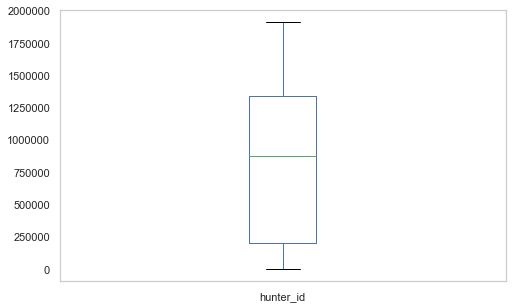

In [15]:
plt.figure(figsize=(8,5))
dataset.boxplot(column='hunter_id', return_type='axes', grid=False)
plt.savefig("box_plot_hunters")

Applicando il metodo `describe` alla colonna *hunter_name* si ottiene:
* **count** indica il numero di celle non nulle per ogni riga 
* **unique** indica il valore distinto (unico) presente nella colonna hunter_name
* **top** indica il nome dell'hunter presente più volte nella colonna hunter_name
* **freq** indica il numero di volte (la frequenza) che il "top" hunter compare nella colonna hunter_name

In [16]:
dataset['hunter_name'].describe()

count     3537         
unique    2888         
top       Chris Messina
freq      36           
Name: hunter_name, dtype: object